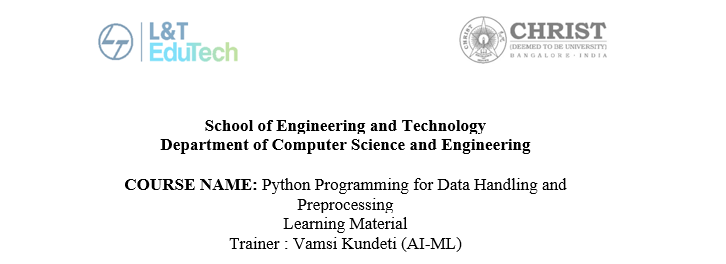




## Unit-3 Scikit- Learn and Feature Selection and Big Data
Introduction to Scikit- learn and Installation - Categorical Data - Introduction to Visualization - Encode the Dataset - Encoding Non-Numeric Values in Input Data - Modeling with Selected Categorical Features - Modeling with Selected Numerical Features - Building and Predicting with Cleaned and Encoded Data - Recursive Feature Elimination - Standardization and Normalization- Implementation - Sampling – Handling imbalanced datasets - Spark – Spark RDD, Spark Data frame, Decision Tree, K-means Clustering	6



## 3.1 Introduction to Scikit -Learn and Installation

### What is Scikit-learn?
### Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. 

 It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

 Scikit-learn, also known as sklearn, is an open-source, machine learning and data modeling library for Python. 

 It features various classification, regression and clustering algorithms and is designed to interoperate with the Python libraries, NumPy and SciPy.

Scikit-learn was first released in 2010, and it has since gained a prominent place in the Python machine learning ecosystem.

 It implements numerous data modeling and machine learning algorithms, and provides consistent Python APIs. It supports a standardized and concise model interface across models. For example, Scikit-learn makes use of a simple fit/predict workflow model for its classification algorithms.

### Installation 
### Command to install scikit learn package is 

## ! pip install scikit-learn

### How to Import package ?

## from sklearn.preprocessing import StandardScaler

## 3.2 Categorical Data

### What is Categorical Data?
### When we collect data, we often encounter different types of variables. One such type is categorical variables. Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number.

 Here are a few examples of categorical variables:
 • Places: Delhi, Mumbai, Ahmedabad, Bangalore, etc.

 • Departments: Finance, Human resources, IT, Production.

 • Grades: A, A-, B+, B, B- etc.

### There are two types of categorical data -

### 1. Ordinal Data : This means that the categories can be Ranked or ordered from highest to lowest or vice versa.

### 2. Nominal Data : The categories of nominal data do not have an Inherent Order. This means that the categories cannot be ranked or ordered.

## 3.3 Visualization for Categorical data

 Categorical data can be visualized by different charts like Barch chart,Pie Chart,Count plot etc,sample barchart of given dataset is given

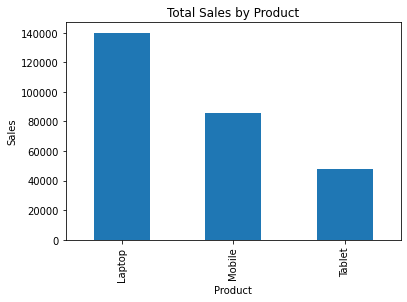

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Product": ["Mobile","Laptop","Tablet","Mobile","Laptop","Mobile","Tablet","Laptop","Mobile","Tablet"],
    "Region": ["South","North","South","East","West","North","East","South","West","North"],
    "Sales": [20000,45000,15000,22000,48000,21000,16000,47000,23000,17000]
})

# Bar chart – Total sales by product
sales_by_product = df.groupby("Product")["Sales"].sum()
sales_by_product.plot(kind="bar")
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()


## 3.4 Encoding of Dataset
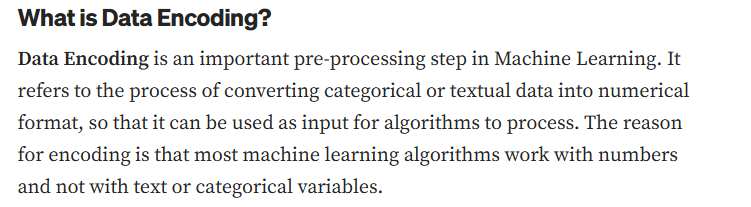

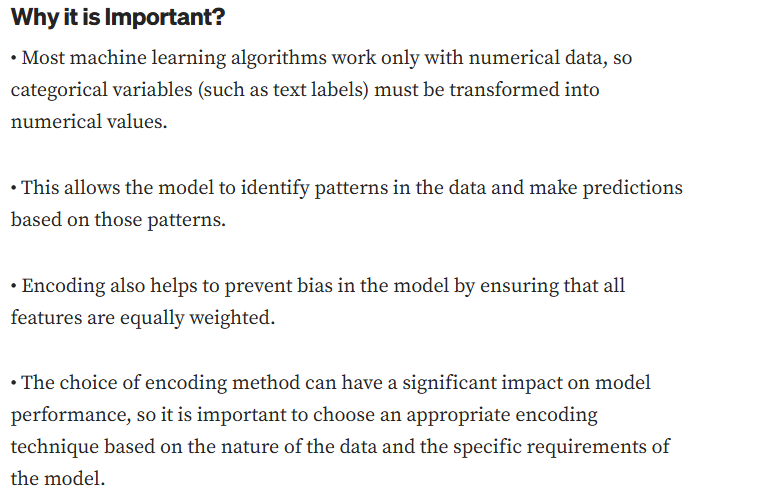

### There are several methods for encoding categorical variables, We will discuss few of types

## 1. One-Hot Encoding: 
### One-Hot Encoding is the Most Common method for encoding Categorical variables.A Binary Column is created for each Unique Category in the variable. If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0.
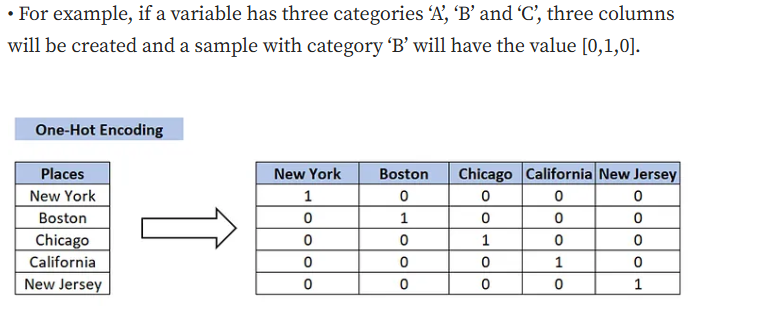


## 2. Label Encoding
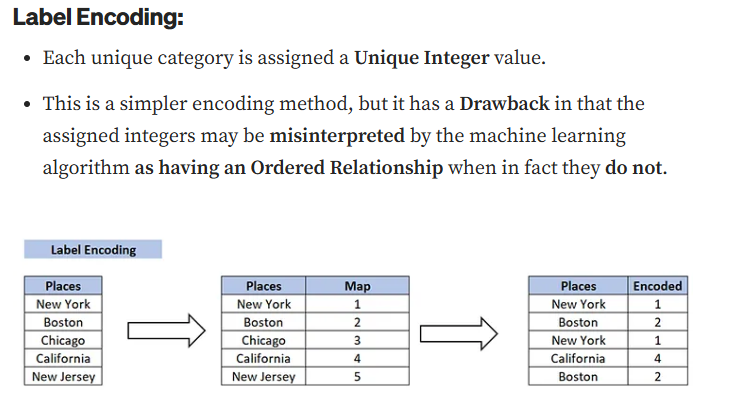

## 3. Ordinal Encoding
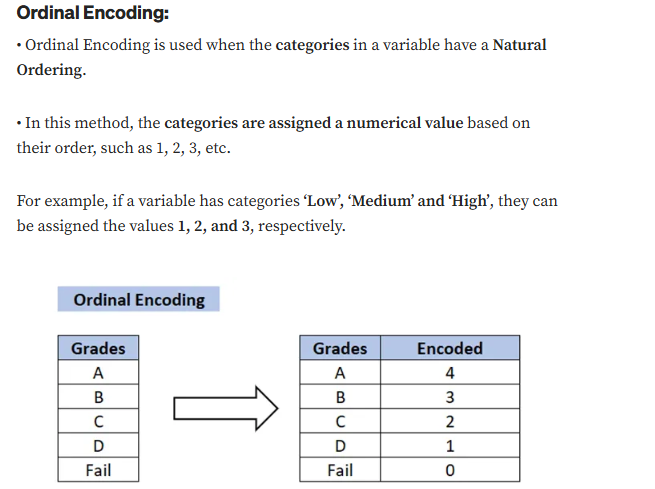

## 4. Binary Encoding
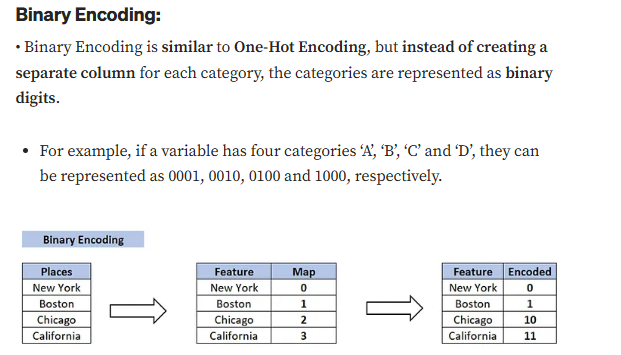



## Step 1: Load the Dataset 
### Lets Demonstrate the various types data encoding Techniques 
#### Here is the  Url to download the dataset is : https://github.com/kundetivamsi2001/Datasets_AI-ML/blob/main/Diabetes-Data.csv




#### Here is the Feature Description with Typical Ranges / Values

| **Column Name** | Description | Typical Values / Ranges |
|-----------------|-------------|--------------------------|
| **Age** | Age of the individual (years) | 18 – 90 years |
| **Sex** | Gender of the individual | Male, Female |
| **Ethnicity** | Ethnic background | White, Asian, Black, Hispanic |
| **BMI** | Body Mass Index | 15 – 50 kg/m² |
| **Waist Circumference** | Waist measurement (cm) | 60 – 150 cm |
| **Fasting Blood Glucose** | Fasting glucose level (mg/dL) | 70 – 200 mg/dL |
| **HbA1c** | Glycated hemoglobin (%) | 4.5 – 14 % |
| **Blood Pressure Systolic** | Systolic BP (mmHg) | 90 – 200 mmHg |
| **Blood Pressure Diastolic** | Diastolic BP (mmHg) | 60 – 120 mmHg |
| **Cholesterol Total** | Total cholesterol (mg/dL) | 120 – 320 mg/dL |
| **Cholesterol HDL** | "Good" cholesterol (mg/dL) | 20 – 100 mg/dL |
| **Cholesterol LDL** | "Bad" cholesterol (mg/dL) | 50 – 250 mg/dL |
| **GGT** | Liver enzyme level | 5 – 200 U/L |
| **Serum Urate** | Uric acid level (mg/dL) | 3 – 10 mg/dL |
| **Physical Activity Level** | Activity category | Low, Moderate, High |
| **Dietary Intake Calories** | Daily calories | 1000 – 4000 kcal/day |
| **Alcohol Consumption** | Alcohol intake | None, Moderate, Heavy |
| **Smoking Status** | Smoking habits | Never, Former, Current |
| **Family History of Diabetes** | Family history flag | 0 or 1 |
| **Previous Gestational Diabetes** | Gestational diabetes history | 0 or 1 |
| **Diabetes** | Target variable | 0 = Non-Diabetic, 1 = Diabetic |


In [264]:
#load the datset
import pandas as pd
import numpy as np
df=pd.read_csv('Diabetes-Data.csv')
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [265]:
#basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [266]:
#Actually Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes are also categorical because they are in 
#encoded form its showing as numerical lets fix that and also drop that unamed column
df=df.drop('Unnamed: 0',axis=1)
df['Family_History_of_Diabetes']=df['Family_History_of_Diabetes'].astype('category')
df['Previous_Gestational_Diabetes']=df['Previous_Gestational_Diabetes'].astype('category')
df['Diabetes']=df['Diabetes'].astype('category')

In [267]:
#lets explore categorical and numerical variables
cat_cols = df.select_dtypes(include=["object", "category"]).columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [268]:
#categorical columns
cat_cols

Index(['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
       'Smoking_Status', 'Family_History_of_Diabetes',
       'Previous_Gestational_Diabetes', 'Diabetes'],
      dtype='object')

In [269]:
#Numerical columns
num_cols

Index(['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT',
       'Serum_Urate', 'Dietary_Intake_Calories'],
      dtype='object')

In [270]:
#check for descriptive statistics
df[num_cols].describe()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900
std,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803
min,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000
25%,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000
50%,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000
75%,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000
max,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000


In [271]:
#1. One hot Encoding
#make a copy of dataframe
df_cat=df[cat_cols]
import pandas as pd
#lets encode 'Ethnicity' variable where order doesn't matter
one_hot = pd.get_dummies(df['Ethnicity'])
df_cat = pd.concat([df_cat, one_hot], axis=1)
df_cat=df_cat.drop('Ethnicity',axis=1)
df_cat.head()

,Sex,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,Asian,Black,Hispanic,White
0,Female,Moderate,Moderate,Never,0,1,1,0,0,0,1
1,Male,Moderate,Moderate,Current,0,1,1,1,0,0,0
2,Female,Low,Heavy,Former,1,0,1,0,1,0,0
3,Male,Low,Moderate,Never,1,0,1,1,0,0,0
4,Female,Moderate,Heavy,Current,0,0,1,1,0,0,0


In [272]:
#2. Label Encoding
#Encode 'Sex' variable using label Encoding where it is nominal variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat['Sex']=le.fit_transform(df_cat['Sex'])
df_cat.head()

,Sex,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,Asian,Black,Hispanic,White
0,0,Moderate,Moderate,Never,0,1,1,0,0,0,1
1,1,Moderate,Moderate,Current,0,1,1,1,0,0,0
2,0,Low,Heavy,Former,1,0,1,0,1,0,0
3,1,Low,Moderate,Never,1,0,1,1,0,0,0
4,0,Moderate,Heavy,Current,0,0,1,1,0,0,0


In [273]:
#3. Ordinal Encoding 
# encode 'Physical_Activity_Encoded' variable using ordinal encoding where orders of categories matters for model predction
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Low', 'Moderate', 'High']])#if not provide order ,it will follow alphabetical order
df_cat['Physical_Activity_Level'] = oe.fit_transform(df_cat[['Physical_Activity_Level']])
df_cat.head()

,Sex,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,Asian,Black,Hispanic,White
0,0,1.0,Moderate,Never,0,1,1,0,0,0,1
1,1,1.0,Moderate,Current,0,1,1,1,0,0,0
2,0,0.0,Heavy,Former,1,0,1,0,1,0,0
3,1,0.0,Moderate,Never,1,0,1,1,0,0,0
4,0,1.0,Heavy,Current,0,0,1,1,0,0,0


In [274]:
#Do the same ordinal encoding for ''Alcohol_Consumption'' column
col_map={'None':0,'Moderate':1,'Heavy':2}
df_cat['Alcohol_Consumption'] = df_cat['Alcohol_Consumption'].map(col_map)
df_cat.head()

,Sex,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,Asian,Black,Hispanic,White
0,0,1.0,1,Never,0,1,1,0,0,0,1
1,1,1.0,1,Current,0,1,1,1,0,0,0
2,0,0.0,2,Former,1,0,1,0,1,0,0
3,1,0.0,1,Never,1,0,1,1,0,0,0
4,0,1.0,2,Current,0,0,1,1,0,0,0


In [275]:
#ordinal encoding for 'Smoking_Status' column
smoke_map = {'Never': 0, 'Former': 1, 'Current': 2}
df_cat['Smoking_Status'] = df_cat['Smoking_Status'].map(smoke_map)
df_cat.head()

,Sex,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,Asian,Black,Hispanic,White
0,0,1.0,1,0,0,1,1,0,0,0,1
1,1,1.0,1,2,0,1,1,1,0,0,0
2,0,0.0,2,1,1,0,1,0,1,0,0
3,1,0.0,1,0,1,0,1,1,0,0,0
4,0,1.0,2,2,0,0,1,1,0,0,0


## 3.4. Standardisation and Normalization
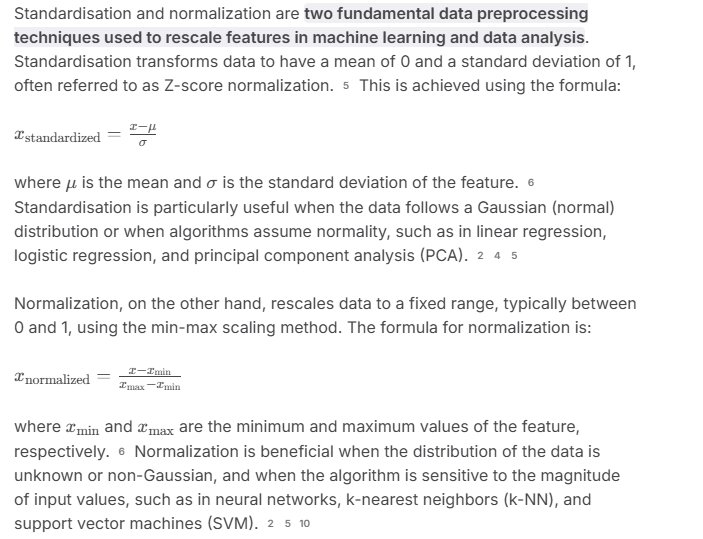

In [276]:
#let preprocess the numerical variable
df_num=df[num_cols]
df_num.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories
0,58,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,1538
1,48,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,2653
2,34,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,1684
3,62,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,3796
4,27,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,3161


### i .) Standardisation

In [277]:
#StandardScaler  which is available in sklearn is used to scale the fetures
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(df_num)
df_sc

array([[ 0.93284619,  1.03424207, -0.7924223 , ..., -0.6826845 ,
         1.16601256, -1.68081008],
       [ 0.23563088, -0.86185894, -1.62676548, ...,  1.28791071,
         0.41000849, -0.12486869],
       [-0.74047054, -0.71600502,  1.32124708, ...,  0.03986707,
         0.95982963, -1.47707246],
       ...,
       [ 0.37507394, -0.06776535,  0.7997826 , ...,  1.18358508,
        -0.41472321,  0.60356306],
       [ 1.21173231, -0.34326721,  1.74537153, ..., -1.15408179,
        -0.20854028,  1.02638839],
       [-1.08907819, -1.42906865,  0.50080963, ...,  0.51512827,
         0.34128085,  0.24492904]])

In [278]:
#DataFrame After Standardisation
df_sc=pd.DataFrame(df_sc,columns=df_num.columns)
df_sc.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories
0,0.932846,1.034242,-0.792422,-0.289018,0.438405,0.683147,1.417961,-0.636977,-0.331530,-0.937421,-0.682685,1.166013,-1.680810
1,0.235631,-0.861859,-1.626765,1.300070,1.036593,-1.193599,0.083617,0.848070,0.480211,0.321228,1.287911,0.410008,-0.124869
2,-0.740471,-0.716005,1.321247,0.191960,1.571813,1.717273,0.837812,0.834104,-1.576660,0.793222,0.039867,0.959830,-1.477072
3,1.211732,0.531856,0.389564,0.866924,-0.222749,1.602370,1.650021,-0.972160,-0.957535,-1.342749,-0.802466,-0.071085,1.470146
4,-1.228521,0.661504,1.112661,0.308883,-0.757970,-0.465881,0.431707,-0.511283,-0.077001,-1.108086,1.032893,1.303468,0.584027


### ii.) Normalization

In [279]:
#Normalisation can be dome using MinMax Scaler class avaible in sklearn pacakge
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df_nm=mm.fit_transform(df_num)
df_nm

array([[0.7755102 , 0.80465116, 0.268     , ..., 0.30555556, 0.84      ,
        0.01520608],
       [0.57142857, 0.26046512, 0.028     , ..., 0.87222222, 0.62      ,
        0.46138455],
       [0.28571429, 0.30232558, 0.876     , ..., 0.51333333, 0.78      ,
        0.07362945],
       ...,
       [0.6122449 , 0.48837209, 0.726     , ..., 0.84222222, 0.38      ,
        0.67026811],
       [0.85714286, 0.40930233, 0.998     , ..., 0.17      , 0.44      ,
        0.79151661],
       [0.18367347, 0.09767442, 0.64      , ..., 0.65      , 0.6       ,
        0.56742697]])

In [280]:
#DataFrame After Normalisation
df_nm=pd.DataFrame(df_nm,columns=df_num.columns)
df_nm.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories
0,0.775510,0.804651,0.268,0.414615,0.627273,0.696629,0.915254,0.318667,0.404,0.224615,0.305556,0.84,0.015206
1,0.571429,0.260465,0.028,0.874615,0.800000,0.146067,0.525424,0.744000,0.640,0.587692,0.872222,0.62,0.461385
2,0.285714,0.302326,0.876,0.553846,0.954545,1.000000,0.745763,0.740000,0.042,0.723846,0.513333,0.78,0.073629
3,0.857143,0.660465,0.608,0.749231,0.436364,0.966292,0.983051,0.222667,0.222,0.107692,0.271111,0.48,0.918768
4,0.142857,0.697674,0.816,0.587692,0.281818,0.359551,0.627119,0.354667,0.478,0.175385,0.798889,0.88,0.664666


In [282]:
#final dataframe 
df=pd.concat([df_cat,df_nm],axis=1)
df.head()

,Sex,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,Asian,Black,Hispanic,...,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories
0,0,1.0,1,0,0,1,1,0,0,0,...,0.414615,0.627273,0.696629,0.915254,0.318667,0.404,0.224615,0.305556,0.84,0.015206
1,1,1.0,1,2,0,1,1,1,0,0,...,0.874615,0.800000,0.146067,0.525424,0.744000,0.640,0.587692,0.872222,0.62,0.461385
2,0,0.0,2,1,1,0,1,0,1,0,...,0.553846,0.954545,1.000000,0.745763,0.740000,0.042,0.723846,0.513333,0.78,0.073629
3,1,0.0,1,0,1,0,1,1,0,0,...,0.749231,0.436364,0.966292,0.983051,0.222667,0.222,0.107692,0.271111,0.48,0.918768
4,0,1.0,2,2,0,0,1,1,0,0,...,0.587692,0.281818,0.359551,0.627119,0.354667,0.478,0.175385,0.798889,0.88,0.664666


### 3.5 Sampling – Handling imbalanced datasets 
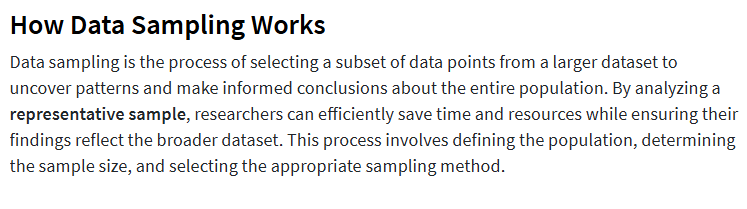
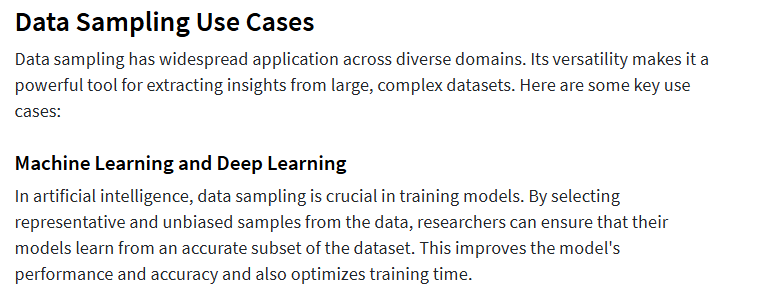

#### One of the primary challenges in data sampling is determining the appropriate sample size. The sample needs to be large enough to capture the full diversity of the dataset, ensuring the insights are reliable and representative of the entire population. However, an excessively large sample size can waste time and resources without significantly better results.

#### Another critical challenge in data sampling is the presence of incomplete, inconsistent, or biased data. When artificial intelligence (AI) systems are trained on limited or biased data, their ability to generalize and perform effectively in real-world scenarios reduces substantially.

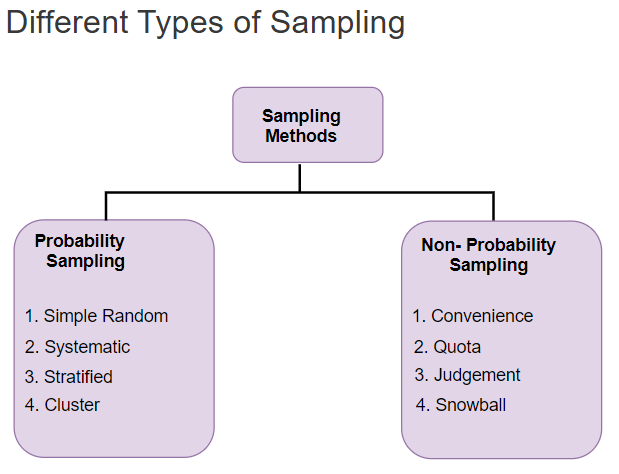

In [240]:
#Let us check whether the dataset is balanced or not if not we have to balance it using Suitable Sampling techniques
df['Diabetes'].value_counts()

1    9018
0     982
Name: Diabetes, dtype: int64

#### From above output class '1' sample are extermely high comapred to class '0'. So we hav eto balance the data either increasing class '0' or decreasing class '1' samples
#### 1.) To Decrease class '1' samples we will use UnderSampling
#### 2.) To increase class '0' samples we will use OverSampling
#### 3.)SMOTE = Synthetic Minority Over-sampling Technique: Creates synthetic minority samples, not duplicates.
#### Lets demonstrate both

In [283]:
#1. Undersampling of class '1' samples
from imblearn.under_sampling import RandomUnderSampler
#Divide the independent(X) and dependent varaible (y) 
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

y_under.value_counts()


c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


0    982
1    982
Name: Diabetes, dtype: int64

#### When to use
#### If your Dataset is very large,this type of sampling leads to lose data.Reduces the majority class (1) to match the minority (0).
### Disadvantage: You throw away a lot of useful data which leads to loss of potential data

In [284]:
#2. Oversampling of class '0' samples
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)

y_over.value_counts()


c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


0    9018
1    9018
Name: Diabetes, dtype: int64

#### When to use this:
#### When your dataset is small.
### Disadvantage : Duplicates minority class samples which leads to risk of overfitting
### To avoid creating duplicates we use a technique called SMOTE

#### 3.  SMOTE = Synthetic Minority Over-sampling Technique
#### Important: Correct order (very common mistake)
❌ Don’t do SMOTE before split

✅ Do split first, then SMOTE on training data

#### Before building a model we have to split the data into training and testing data .Usually in ML while building model we will divide dataset as 80-20 % or 70-30 % for trainingand testing sets respectively

In [286]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# keep pandas objects
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

y_train_bal.value_counts()

c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


0    7209
1    7209
Name: Diabetes, dtype: int64

## 3.6 Spark-Spark RDD-SparkDatafrme
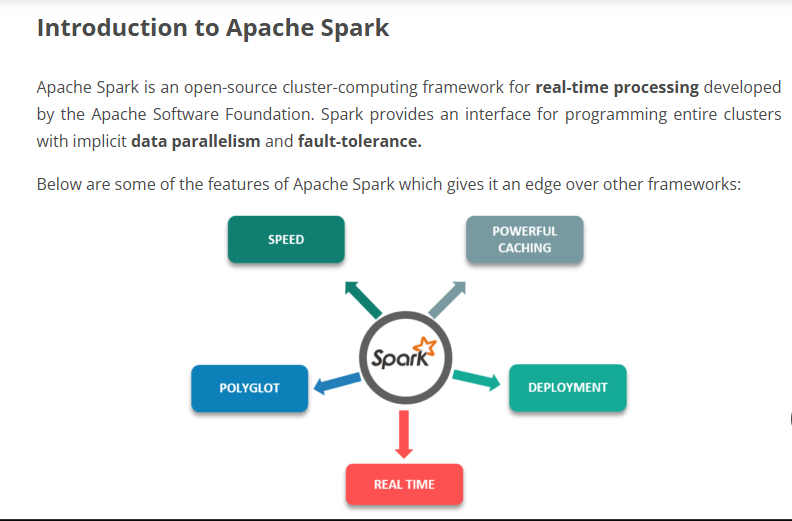

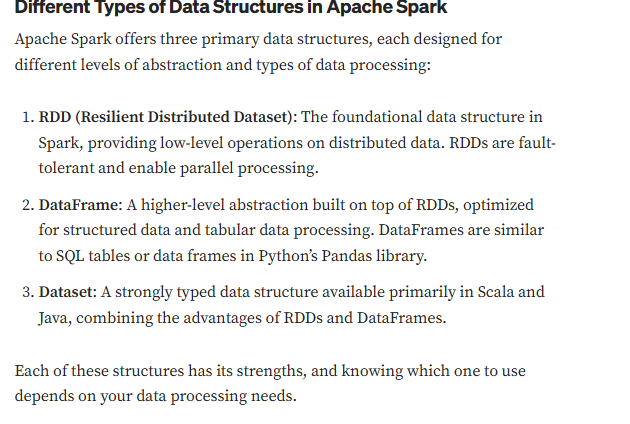

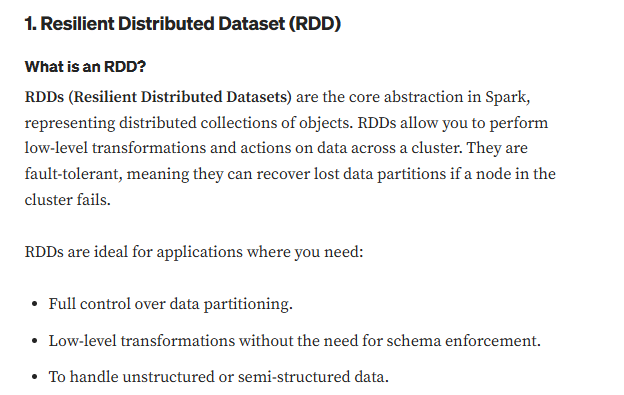

### Difference between PandasDataFrame and spark dataframe

In [1]:
#pandas version
import pandas as pd

data = {
    "OrderID": [1,2,3,4,5],
    "Product": ["Laptop","Phone","Laptop","Tablet","Phone"],
    "Region": ["South","North","West","South","West"],
    "Sales": [1200, 800, 1500, 200, 600]
}

df = pd.DataFrame(data)

# Filter sales > 300
filtered = df[df["Sales"] > 300]

# Group by product and sum sales
result = filtered.groupby("Product")["Sales"].sum()

result


c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Product
Laptop    2700
Phone     1400
Name: Sales, dtype: int64

In [ ]:
## Spark DataFrame version
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

spark = SparkSession.builder.appName("Sales").getOrCreate()

data = [
    (1, "Laptop", "South", 1200),
    (2, "Phone", "North", 800),
    (3, "Laptop", "West", 1500),
    (4, "Tablet", "South", 200),
    (5, "Phone", "West", 600)
]

columns = ["OrderID", "Product", "Region", "Sales"]

df = spark.createDataFrame(data, columns)

filtered = df.filter(col("Sales") > 300)

result = filtered.groupBy("Product").agg(sum("Sales").alias("TotalSales"))

result.show()

### Better to run in googlr collab or else we have install and set up java path 


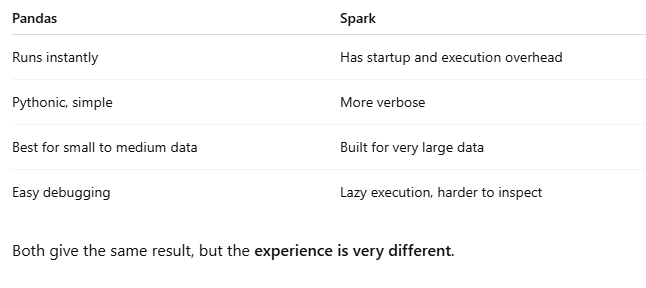

### Decision Tree 

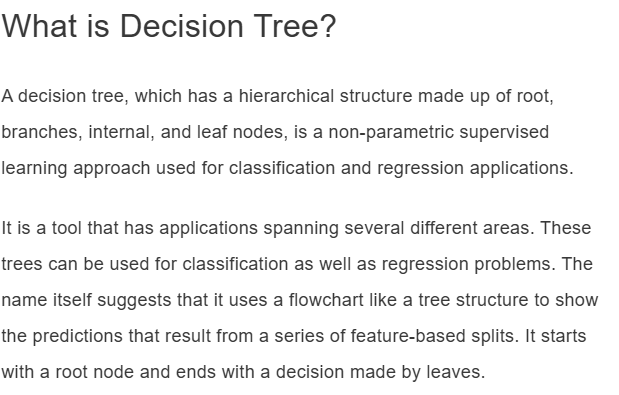

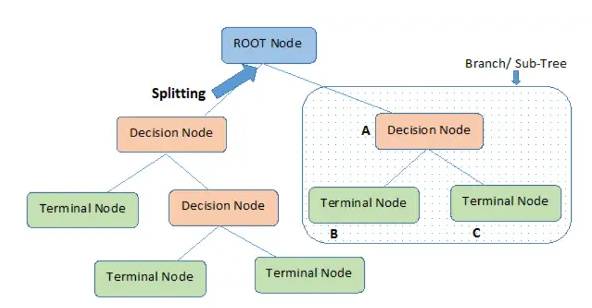

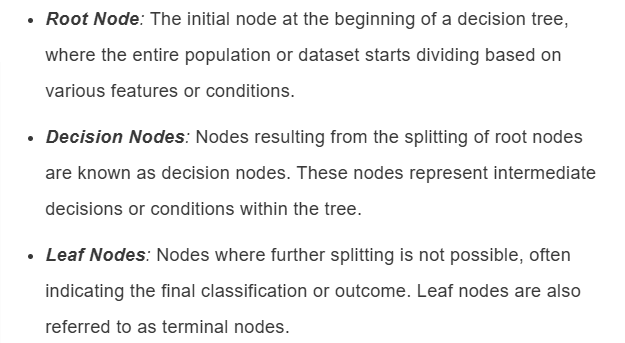

### K-Means Clustering

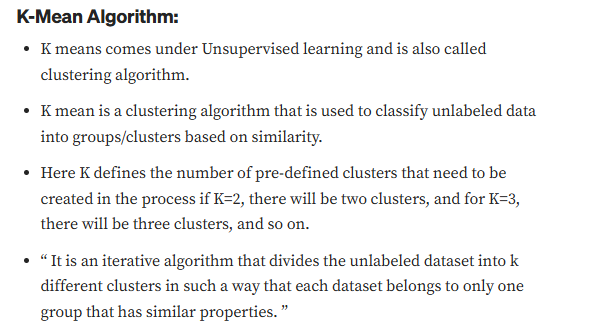

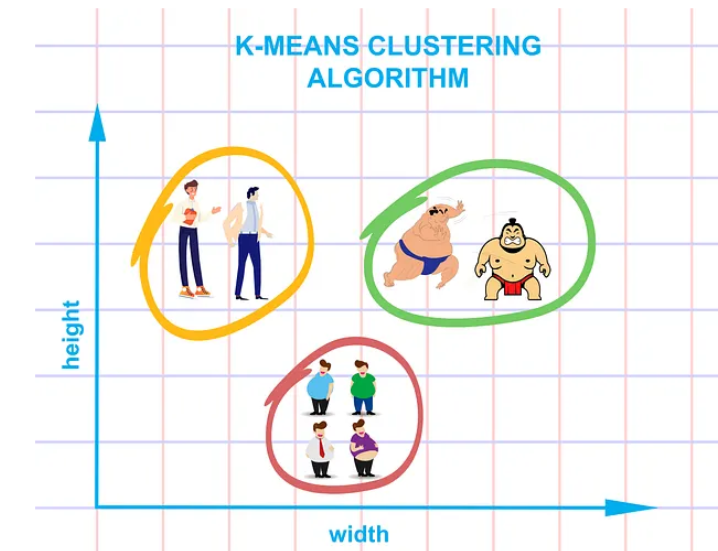

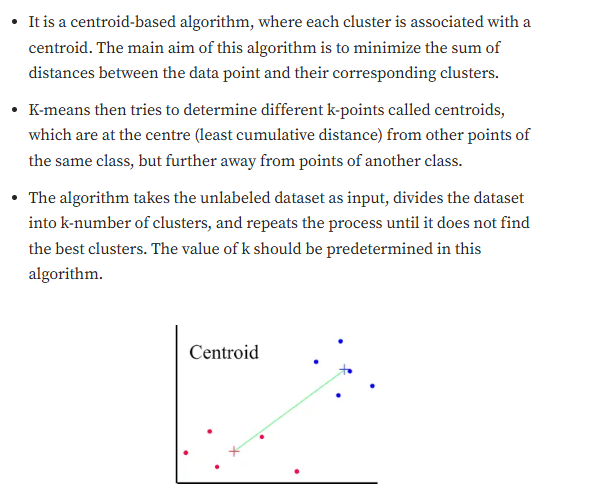

## Application OF K-Mean Algorithm:
### The k-means algorithm is a popular clustering algorithm used in various fields to group data points into distinct clusters. Here are some common applications of the k-means algorithm:

### Image Segmentation: In image processing, k-means can be used to segment an image into different regions based on colour similarity. Each cluster represents a distinct region in the image, allowing for further analysis or processing.

### Customer Segmentation: In marketing and customer analytics, k-means can be used to segment customers into groups based on their buying behaviour, demographics, or other relevant factors. This information can help businesses target specific customer segments with tailored marketing strategies.

### Anomaly Detection: K-means can be used to identify outliers or anomalies in a dataset. By clustering the data, the algorithm can identify data points that deviate significantly from the rest of the data, which can be useful in detecting fraudulent transactions, network intrusions, or other irregularities.

### Document Clustering: In natural language processing (NLP), k-means can be applied to group similar documents together based on their content. This can be useful for tasks such as document organization, topic modeling, and information retrieval.

### Recommendation Systems: K-means can be used in collaborative filtering-based recommendation systems to cluster users with similar preferences or behaviours. By identifying similar user clusters, personalized recommendations can be generated based on the preferences of users in the same cluster.